In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/usr/local/python/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(
/root/accesibilidad-urbana/aup/analysis.py:587: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  weights = 1.0 (dist + 1e-12)**power


In [2]:
save = True

### Required data - Area of interest

<Axes: >

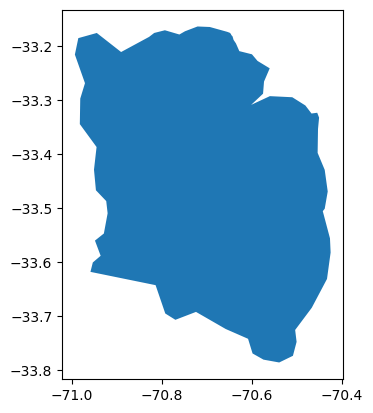

In [3]:
aoi_dir = "../../data/external/prox_latam/aoi_rmsantiago.gpkg"
aoi = gpd.read_file(aoi_dir)

# Show
aoi.plot()

### Required data - pois - dne

In [6]:
dne = gpd.read_file("../../data/external/prox_latam/dne_2017_chile.gpkg")

# Filter por pois
divisiones = [47,56,59,88,90,91,93,96]
dne_pois = gpd.GeoDataFrame()

for d in divisiones:
    dne_tmp = dne.loc[dne['DIVISION_CIIU4CL'] == f'{d}']
    dne_pois = pd.concat([dne_pois,dne_tmp])

# Format
dne_pois = dne_pois.rename(columns={'DIVISION_CIIU4CL':'code'})
dne_pois = dne_pois[['code','geometry']]
dne_pois['code'] = dne_pois['code'].astype('int64')

# Show
print(dne_pois.shape)
dne_pois.head(2)

(353643, 2)


,code,geometry
0,47,POINT (-70.14256 -20.21390)
1,47,POINT (-70.12391 -20.26698)


### Required data - pois - Educación parvularia (preescolar)

In [8]:
parvularia = gpd.read_file("../../data/external/prox_latam/educacion_parvularia_chile_epsg4326.gpkg")

# Format
parvularia.loc[:,'code'] = 611111
pavularia_pois = parvularia[['code','geometry']]

# Show
print(pavularia_pois.shape)
pavularia_pois.head(2)

(11951, 2)


,code,geometry
0,611111,POINT (-70.30276 -18.46986)
1,611111,POINT (-70.31758 -18.48249)


### Required data - pois - Educación escolar (básica)

In [9]:
escolar = gpd.read_file("../../data/external/prox_latam/educacion_escolar_chile_epsg4326.gpkg")

# Format
escolar.loc[:,'code'] = 611121
escolar_pois = escolar[['code','geometry']]

# Show
print(escolar_pois.shape)
escolar_pois.head(2)

(11285, 2)


,code,geometry
0,611121,POINT (-67.07622 -55.08317)
1,611121,POINT (-67.60534 -54.93480)


### Required data - pois - salud

In [7]:
salud = gpd.read_file("../../data/external/prox_latam/salud_chile_epsg4326.gpkg")

# Filter por pois
tipos = ['Hospital','Clínica','Centro de Salud','Centro de Salud Familiar (CESFAM)',
         'Centro Comunitario de Salud Familiar (CECOSF)',
         'Servicio de Atención Primaria de Urgencia (SAPU)',
         'Servicio de Atención Primaria de Urgencia de Alta Resolutividad (SAR)',
         'Consultorio General Urbano (CGU)','Consultorio General Rural (CGR)',
         'Servicio de Atención Primaria de Urgencia de Alta Resolutividad  (SAR)',
         'Servicio de Urgencia Rural (SUR)']

salud_pois = gpd.GeoDataFrame()

for t in tipos:
    salud_tmp = salud.loc[salud['TIPO'] == t]
    salud_pois = pd.concat([salud_pois,salud_tmp])

# Format
salud_pois.loc[:,'code'] = 8610
salud_pois = salud_pois[['code','geometry']]

# Show
print(salud_pois.shape)
salud_pois.head(2)

(2162, 2)


,code,geometry
33,8610,POINT (-70.31295 -18.48248)
37,8610,POINT (-70.25005 -18.54442)


### Required data - pois - Concatenate data

In [10]:
pois = pd.concat([dne_pois,salud_pois,pavularia_pois,escolar_pois])

# Save
if save:
    pois.to_file('../../data/external/prox_latam/pois_santiago.gpkg', driver='GPKG')
    
# Show
print(pois.shape)
pois.head(2)

(379041, 2)


,code,geometry
0,47,POINT (-70.14256 -20.21390)
1,47,POINT (-70.12391 -20.26698)
